In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import pandas as pd
%matplotlib widget
import matplotlib.pyplot as plt

from uriel import Uriel
from utils import fam
from papers import papers

In [ ]:
from matplotlib.collections import LineCollection

def compare_approaches(languages, scores, family):
    uriel = Uriel(load=True, languages=languages)
        
    d = pd.DataFrame(
        [
            (
                fam,
                (count := sum(uriel.is_in_family(language, fam) for language in languages)),
                100 * count / len(languages)
            )
             for fam
             in uriel.coi
        ],
        columns=['Family', 'Count', 'Ratio']
    )
    print(d)
    
    print(scores.shape)
    xs = np.mean(scores, axis=0)        
    ys_in = np.mean(scores[
            [i
             for i, l
             in enumerate(languages)
             if uriel.is_in_family(l, family)
            ]
        ], axis=0)
    ys_out = np.mean(scores[
        [i
         for i, l
         in enumerate(languages)
         if not uriel.is_in_family(l, family)
        ]
    ], axis=0)
    fig, axes = plt.subplots(1, 2)
    for ax, ys in zip(axes, [ys_in, ys_out]):
        col = LineCollection(segments=[[(0,0), (100,100)]], linewidths=1, colors='b')
        ax.add_collection(col, autolim=False)
        ax.scatter(xs, ys, c='r', s=2)
        for i, xy in enumerate(zip(xs, ys)):     
            ax.annotate(
                text=i,
                xy=xy,
                xytext=(1, 1),
                textcoords='offset points',
                ha='right',
                va='bottom',
                fontsize='xx-small')
    fig.show()


- Most datasets seem to be stable
- There is no usually no particular difference between using GIS and Indo-European languages. Probably because there is not that many non-IE languages used.
- There are only two cases when I found a linguistic bias - Rahimi 2019 NER and Heinzerling 2019 POS. Are the difference statistically significant (especially in H- case)? Are there any other examples that have the same problems?
- There are not that many papers doing proper multilingual evaluation with all the scores reported. When a multilingual evaluation is done, usually it is not compared with different approaches since it is probably already hard to make it work with one approach.

# Rahimi 2019

[Massively Multilingual Transfer for NER](https://arxiv.org/pdf/1902.00193.pdf). 

They compare high-resource (1) and low-resource (2) training. Supervised multi-source transfer learning (3-6) and unsupervised multi-source transfer learning (7-13). We can see that unsupervised transfer learning is falling behind significantly on non-GIS languages compared to low-resource supervised learning. Compare 2 and 10, 10 is better by almost 8 F1, but it has almost identical performance for non-GIS languages. This contrast might be caused by small number of non-GIS languages in the training data. However, it might mislead people into over-confident assessment about transfer learning methods capabilities.

Compare the results with Figure 3 from the paper (reproduce below), which seems to be quite conclusive. They address the linguistic imbalance partially by saying _Further analysis show that majority voting works reasonably well for Romance and Germanic languages, which are well represented in the dataset, but fails miserably compared to single best for Slavic languages (e.g. ru, uk, bg) wherethere are only a few related languages._

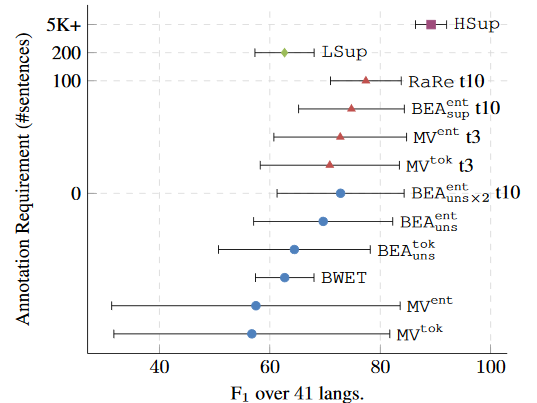

In [ ]:
compare_approaches(*papers['rahimi_ner'], fam.gis)

# Heinzerling 2019

[Sequence Tagging with Contextual and Non-Contextual Subword Representations: A Multilingual Evaluation](https://arxiv.org/pdf/1906.01569.pdf)

But there seems to be a problem with POS tagging, which has smaller number of languages. Is it even statistically signficant? (only 6 non GRS languages). On the other hand, we can see that BERT (6) is much worse than the rest of the pack and its improvements (7 and 8.) are also on the bottom of the pack. Similarly to 9 and 10

**Note:** The original data had NRM for Norman Wikipedia, but NRM is the ISO-code for Narom language from Malaysia. NRM was changed to NRF (Norman ISO code) in the data. Similarly ARC (Old Aramaic) was corrected to SYR (Syriac). 

In [ ]:
compare_approaches(*papers['heinzerling_ner'], fam.gis)

In [ ]:
compare_approaches(*papers['heinzerling_pos'], fam.gis)

# Artetxe 2020

[Translation Artifacts in Cross-lingual Transfer Learning](https://www.aclweb.org/anthology/2020.emnlp-main.618.pdf)

XNLI seems to be quite stable - GIS only 39%

In [ ]:
compare_approaches(*papers['artetxe_nli'], fam.gis)

In [ ]:
compare_approaches(*papers['artetxe_nli_2'], fam.gis)

# Huang 2019

[Unicoder: A Universal Language Encoder by Pre-training with Multiple Cross-lingual Tasks](https://arxiv.org/abs/1909.00964)

Similarly to Artetxe above, NLI seems to be stable

In [ ]:
compare_approaches(*papers['huang_nli'], fam.gis)

# Longpre 2020

[MKQA: A Linguistically Diverse Benchmark for Multilingual Open Domain Question Answering](https://arxiv.org/pdf/2007.15207.pdf)

There are slight changes in EM score between some models, but nothing dramatical going on here. F1 looks particularly stable.

In [ ]:
compare_approaches(*papers['longpre_qa_em'], fam.gis)
compare_approaches(*papers['longpre_qa_f1'], fam.gis)

# Wang 2020

[Extending Multilingual BERT to Low-Resource Languages](https://arxiv.org/pdf/2004.13640.pdf)

Very diverse set of languages. No bias there. They use some languages as source languages (Sinhala, Hindi), but I have not found any bias coming from these either.

In [ ]:
compare_approaches(*papers['wang_ner'], fam.gis)

# _UD_ performance

There are some underperformers, e.g. _SLT-Interactions (Bengaluru)_ seems really GIS-oriented compared to _IBM NY (Yorktown Heights)_. But we are talking about $\pm2\%$.

In [ ]:
compare_approaches(*papers['ud'], fam.gis)